### Attempt at prediction from autogenerated dataset

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, GridSearchCV

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [18]:
plt.style.use('ggplot')

In [27]:
# This dataset contains features engineered on a block-by-block basis
dataset = pd.read_csv("/Users/rmartinshort/Documents/Insight/Project/census_block_prediction/Fully_merged_dataset_Autogenerated.csv")

In [28]:
dataset.head(10)

,GISYEARJOIN,IDyear_x,LAT,LON,AREA,Nviolations,Was complaint,Inspection Number,CrimeIsArson,CrimeIsOther,...,IFF003,IFF004,Urban,IDyear_x.1,IDyear_y,GISJOIN,SF_pred,VF_pred,EF_pred,Year
0,G060075002130020022007,2007,37.750066,-122.441075,16958.0,0.0,0.0,0.0,0.0,2.0,...,14,20,1,2007,2008,0,0.0,0.0,0.0,0.0
1,G060075002130020022008,2008,37.750066,-122.441075,16958.0,0.0,0.0,0.0,0.0,2.0,...,14,20,1,2008,2009,0,0.0,0.0,0.0,0.0
2,G060075002130020022009,2009,37.750066,-122.441075,16958.0,0.0,0.0,0.0,0.0,8.0,...,14,20,1,2009,2010,0,0.0,0.0,0.0,0.0
3,G060075002130020022010,2010,37.750066,-122.441075,16958.0,0.0,0.0,0.0,1.0,6.0,...,14,20,1,2010,2011,0,0.0,0.0,0.0,0.0
4,G060075002130020022011,2011,37.750066,-122.441075,16958.0,0.0,0.0,0.0,0.0,5.0,...,14,20,1,2011,2012,0,0.0,0.0,0.0,0.0
5,G060075002130020022012,2012,37.750066,-122.441075,16958.0,0.0,0.0,0.0,0.0,2.0,...,14,20,1,2012,2013,0,0.0,0.0,0.0,0.0
6,G060075002130020022013,2013,37.750066,-122.441075,16958.0,0.0,0.0,0.0,0.0,4.0,...,14,20,1,2013,2014,0,0.0,0.0,0.0,0.0
7,G060075002130020022014,2014,37.750066,-122.441075,16958.0,0.0,0.0,1.0,0.0,5.0,...,14,20,1,2014,2015,0,0.0,0.0,0.0,0.0
8,G060075002130020022015,2015,37.750066,-122.441075,16958.0,0.0,0.0,0.0,0.0,2.0,...,14,20,1,2015,2016,0,0.0,0.0,0.0,0.0
9,G060075002130020022016,2016,37.750066,-122.441075,16958.0,0.0,0.0,0.0,0.0,6.0,...,14,20,1,2016,2017,0,0.0,0.0,0.0,0.0


In [29]:
dataset.columns

Index(['GISYEARJOIN', 'IDyear_x', 'LAT', 'LON', 'AREA', 'Nviolations',
       'Was complaint', 'Inspection Number', 'CrimeIsArson', 'CrimeIsOther',
       'Structure_fire', 'Vehicle_fire', 'External_fire',
       'Year Property Built', 'Assessed Land Value', 'Number of Units',
       'Lot Area', 'COMH', 'COMM', 'COMO', 'COMR', 'GOVT', 'IND', 'MISC',
       'MRES', 'SRES', 'UnkownUseType', 'A', 'B', 'C', 'D', 'S', 'H7X001',
       'H7X002', 'H7X003', 'H7X004', 'H7X005', 'H7X006', 'H7X007', 'H7X008',
       'H8C001', 'H8C002', 'H8C003', 'H8C004', 'H8C005', 'H8C006', 'H8C007',
       'H8C008', 'H8C009', 'IFC001', 'IFF001', 'IFF002', 'IFF003', 'IFF004',
       'Urban', 'IDyear_x.1', 'IDyear_y', 'GISJOIN', 'SF_pred', 'VF_pred',
       'EF_pred', 'Year'],
      dtype='object')

In [30]:
dataset['IDyear_y'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019])

In [31]:
# This dataset contains features engineered on a block-by-block basis
#dataset = pd.read_csv("Fully_merged_dataset_Jan23.csv")

In [32]:
dataset.head()

,GISYEARJOIN,IDyear_x,LAT,LON,AREA,Nviolations,Was complaint,Inspection Number,CrimeIsArson,CrimeIsOther,...,IFF003,IFF004,Urban,IDyear_x.1,IDyear_y,GISJOIN,SF_pred,VF_pred,EF_pred,Year
0,G060075002130020022007,2007,37.750066,-122.441075,16958.0,0.0,0.0,0.0,0.0,2.0,...,14,20,1,2007,2008,0,0.0,0.0,0.0,0.0
1,G060075002130020022008,2008,37.750066,-122.441075,16958.0,0.0,0.0,0.0,0.0,2.0,...,14,20,1,2008,2009,0,0.0,0.0,0.0,0.0
2,G060075002130020022009,2009,37.750066,-122.441075,16958.0,0.0,0.0,0.0,0.0,8.0,...,14,20,1,2009,2010,0,0.0,0.0,0.0,0.0
3,G060075002130020022010,2010,37.750066,-122.441075,16958.0,0.0,0.0,0.0,1.0,6.0,...,14,20,1,2010,2011,0,0.0,0.0,0.0,0.0
4,G060075002130020022011,2011,37.750066,-122.441075,16958.0,0.0,0.0,0.0,0.0,5.0,...,14,20,1,2011,2012,0,0.0,0.0,0.0,0.0


In [33]:
dataset.drop(['IDyear_y','Year','GISJOIN'],axis=1,inplace=True)

In [34]:
dataset.head()

,GISYEARJOIN,IDyear_x,LAT,LON,AREA,Nviolations,Was complaint,Inspection Number,CrimeIsArson,CrimeIsOther,...,IFC001,IFF001,IFF002,IFF003,IFF004,Urban,IDyear_x.1,SF_pred,VF_pred,EF_pred
0,G060075002130020022007,2007,37.750066,-122.441075,16958.0,0.0,0.0,0.0,0.0,2.0,...,65,62,28,14,20,1,2007,0.0,0.0,0.0
1,G060075002130020022008,2008,37.750066,-122.441075,16958.0,0.0,0.0,0.0,0.0,2.0,...,65,62,28,14,20,1,2008,0.0,0.0,0.0
2,G060075002130020022009,2009,37.750066,-122.441075,16958.0,0.0,0.0,0.0,0.0,8.0,...,65,62,28,14,20,1,2009,0.0,0.0,0.0
3,G060075002130020022010,2010,37.750066,-122.441075,16958.0,0.0,0.0,0.0,1.0,6.0,...,65,62,28,14,20,1,2010,0.0,0.0,0.0
4,G060075002130020022011,2011,37.750066,-122.441075,16958.0,0.0,0.0,0.0,0.0,5.0,...,65,62,28,14,20,1,2011,0.0,0.0,0.0


In [35]:
SF_blocks_years = gpd.read_file('SF_block_years_2010.shp')

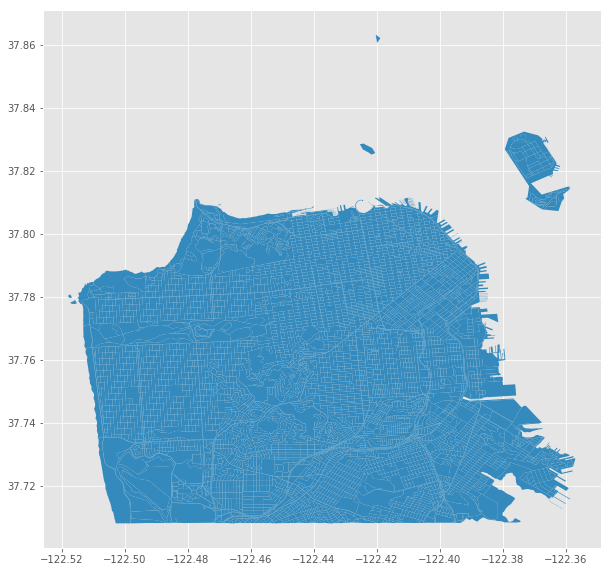

In [36]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
SF_blocks_years[SF_blocks_years['IDyear']==2010].plot(ax=ax)

In [37]:
SF_blocks_years['IDyear'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018])

In [38]:
SF_blocks_years.head()

,GISYEARJOI,IDyear,LAT,LON,AREA,geometry
0,G060075002130020022007,2007,+37.7500665,-122.4410751,16958,POLYGON ((-122.4406159997011 37.75090200039605...
1,G060075002130020022008,2008,+37.7500665,-122.4410751,16958,POLYGON ((-122.4406159997011 37.75090200039605...
2,G060075002130020022009,2009,+37.7500665,-122.4410751,16958,POLYGON ((-122.4406159997011 37.75090200039605...
3,G060075002130020022010,2010,+37.7500665,-122.4410751,16958,POLYGON ((-122.4406159997011 37.75090200039605...
4,G060075002130020022011,2011,+37.7500665,-122.4410751,16958,POLYGON ((-122.4406159997011 37.75090200039605...


In [39]:
Merged_geometry = SF_blocks_years.merge(dataset,left_on='GISYEARJOI',right_on='GISYEARJOIN',how='left')

In [40]:
Merged_geometry.head()

,GISYEARJOI,IDyear,LAT_x,LON_x,AREA_x,geometry,GISYEARJOIN,IDyear_x,LAT_y,LON_y,...,IFC001,IFF001,IFF002,IFF003,IFF004,Urban,IDyear_x.1,SF_pred,VF_pred,EF_pred
0,G060075002130020022007,2007,+37.7500665,-122.4410751,16958,POLYGON ((-122.4406159997011 37.75090200039605...,G060075002130020022007,2007,37.750066,-122.441075,...,65,62,28,14,20,1,2007,0.0,0.0,0.0
1,G060075002130020022008,2008,+37.7500665,-122.4410751,16958,POLYGON ((-122.4406159997011 37.75090200039605...,G060075002130020022008,2008,37.750066,-122.441075,...,65,62,28,14,20,1,2008,0.0,0.0,0.0
2,G060075002130020022009,2009,+37.7500665,-122.4410751,16958,POLYGON ((-122.4406159997011 37.75090200039605...,G060075002130020022009,2009,37.750066,-122.441075,...,65,62,28,14,20,1,2009,0.0,0.0,0.0
3,G060075002130020022010,2010,+37.7500665,-122.4410751,16958,POLYGON ((-122.4406159997011 37.75090200039605...,G060075002130020022010,2010,37.750066,-122.441075,...,65,62,28,14,20,1,2010,0.0,0.0,0.0
4,G060075002130020022011,2011,+37.7500665,-122.4410751,16958,POLYGON ((-122.4406159997011 37.75090200039605...,G060075002130020022011,2011,37.750066,-122.441075,...,65,62,28,14,20,1,2011,0.0,0.0,0.0


In [82]:
# Determine the number of blocks and fires
Merged_geometry [Merged_geometry['IDyear']==2018]['External_fire'].sum()

1213.0

We can now plot maps of the distribution of these variables per year

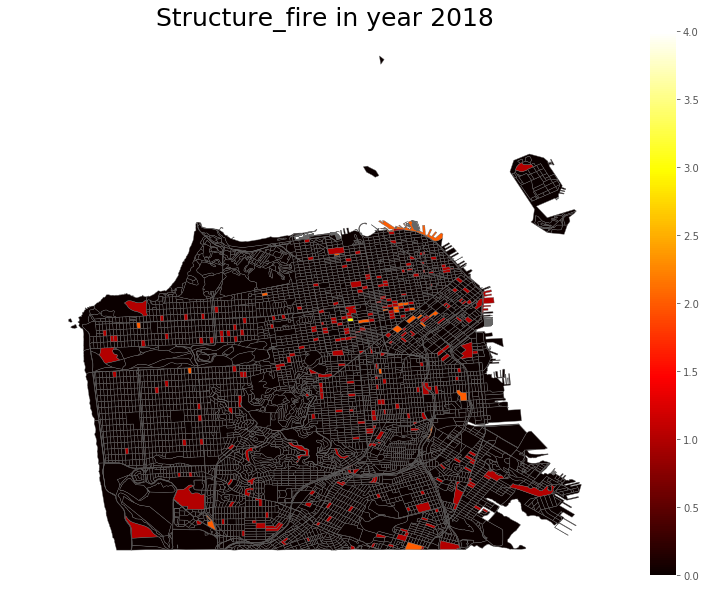

In [71]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

columnname = 'Structure_fire'
year = 2018

Merged_geometry[Merged_geometry['IDyear']==year].plot(cmap='hot',column=columnname,ax=ax,linewidth=0.4,edgecolor='0.4')
title = "%s in year %s" %(columnname,str(year))
ax.axis('off')
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='hot',norm=plt.Normalize(vmin=0, vmax=4))
sm._A = []
cbar = fig.colorbar(sm)
plt.savefig("Fires_structure_2018.png",dpi=400)

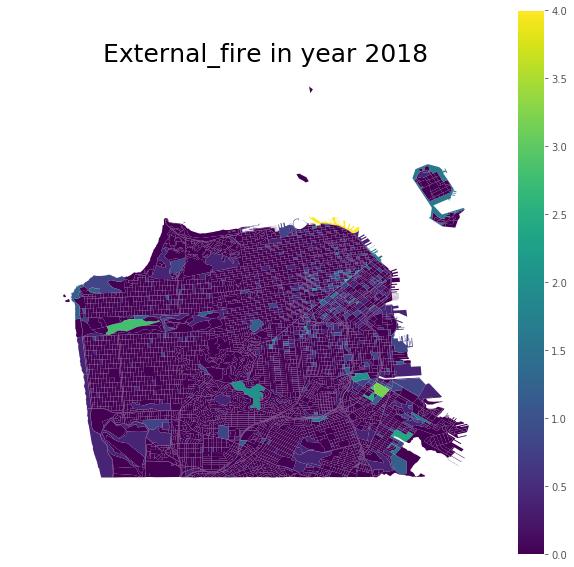

In [50]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

columnname = 'External_fire'
year = 2018

Merged_geometry[Merged_geometry['IDyear']==year].plot(column=columnname,ax=ax)
title = "%s in year %s" %(columnname,str(year))
ax.axis('off')
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=4))
sm._A = []
cbar = fig.colorbar(sm)
plt.savefig("Fires_external_2018.png",dpi=400)

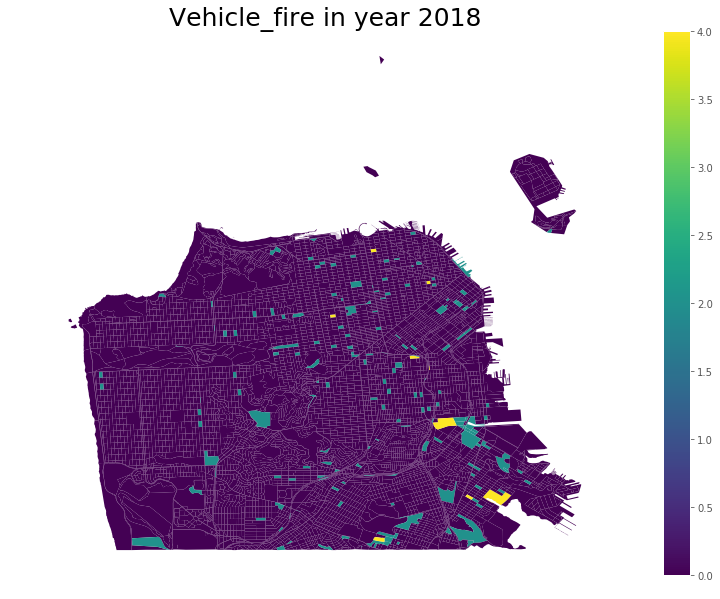

In [53]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

columnname = 'Vehicle_fire'
year = 2018

Merged_geometry[Merged_geometry['IDyear']==year].plot(column=columnname,ax=ax)
title = "%s in year %s" %(columnname,str(year))
ax.axis('off')
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=4))
sm._A = []
cbar = fig.colorbar(sm)
plt.savefig("Fires_vehicle_2018.png",dpi=400)

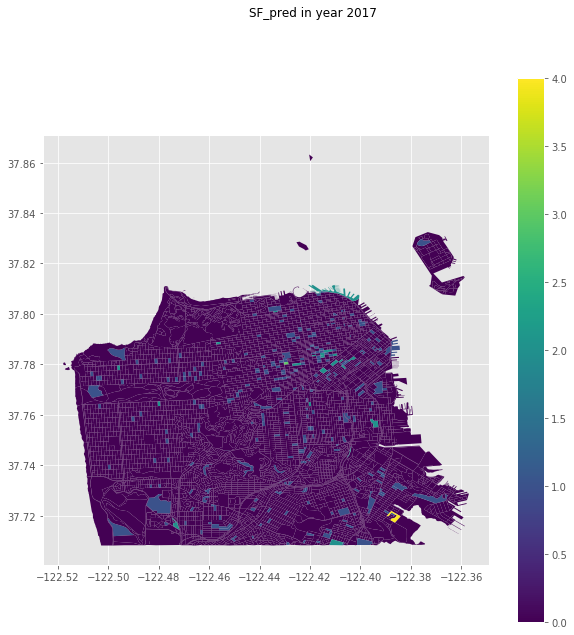

In [319]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

#These are the 2018 fires (since we're predicting)
columnname = 'SF_pred'
year = 2017

Merged_geometry[Merged_geometry['IDyear']==year].plot(column=columnname,legend=True,ax=ax)
fig.suptitle("%s in year %s" %(columnname,str(year)))
plt.savefig("Fires_2018.png",dpi=400)

## Basic modelling setup below

In [320]:
#Classifier 
RC = RandomForestClassifier()
#Pipeline
RC_pipeline = Pipeline([('classify', RC)])
#Search parameter space with 5 fold cross validation

#Parameters to search over
test_parameters = {
    'classify__n_estimators': (150,200,250),
    'classify__max_depth': (5,8,10),
    'classify__min_samples_leaf':(50,60,80),
}

#Number of folds
nfolds=5

#Grid search object to set up
grid_search = GridSearchCV(RC_pipeline, test_parameters, \
                           scoring='roc_auc',verbose=1, cv=nfolds, n_jobs=4)


def perform_grid_search(pipeline_obj,grid_search_obj,X_train,y_train):
    
    '''
    Perform a grid search over hyperparmeters to generate the best model
    '''
    
    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline_obj.steps])
    print("parameters:")
    print(test_parameters)
    t0 = time.time()
    
    #Do the grid search on the training dataset
    grid_search_obj.fit(X_train, y_train)
    
    print("done in %0.3fs" % (time.time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(test_parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
        
    #Return the best estimator object for use with the holdout dataset
    
    return grid_search.best_estimator_

def classify(val):
    
    if val >= 1:
        return 1
    else:
        return 0

In [321]:
len(dataset)

88032

In [322]:
dataset_no_na = dataset.dropna()

In [323]:
len(dataset_no_na)

49792

In [324]:
dataset_no_na['IDyear_x'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [325]:
len(dataset_no_na[dataset_no_na['IDyear_x']==2017])

4529

In [326]:
#This is a datasat for which we will predict the 2019 fires
use_for_future = dataset_no_na[dataset_no_na['IDyear_x']==2018]
#This is the dataset that we'll use to predict the 2018 fires
holdout_2018 = dataset_no_na[dataset_no_na['IDyear_x']==2017]
#This is the dataset that we'll train and test on
traintest = dataset_no_na[dataset_no_na['IDyear_x']<2017]

In [327]:
dataset_no_na.columns

Index(['GISYEARJOIN', 'IDyear_x', 'LAT', 'LON', 'AREA', 'Nviolations',
       'Was complaint', 'Inspection Number', 'CrimeIsArson', 'CrimeIsOther',
       'Structure_fire', 'Vehicle_fire', 'External_fire',
       'Year Property Built', 'Assessed Land Value', 'Number of Units',
       'Lot Area', 'COMH', 'COMM', 'COMO', 'COMR', 'GOVT', 'IND', 'MISC',
       'MRES', 'SRES', 'UnkownUseType', 'A', 'B', 'C', 'D', 'S', 'H7X001',
       'H7X002', 'H7X003', 'H7X004', 'H7X005', 'H7X006', 'H7X007', 'H7X008',
       'H8C001', 'H8C002', 'H8C003', 'H8C004', 'H8C005', 'H8C006', 'H8C007',
       'H8C008', 'H8C009', 'IFC001', 'IFF001', 'IFF002', 'IFF003', 'IFF004',
       'Urban', 'IDyear_x.1', 'SF_pred', 'VF_pred', 'EF_pred'],
      dtype='object')

In [331]:
firecols = ['SF_pred','VF_pred','EF_pred']
todrop = ['GISYEARJOIN','IDyear_x.1']

### Training and testing

In [332]:
fires = traintest[firecols] #This is what we're trying to predict

X = traintest.drop(firecols,axis=1) #This is what we're using to predict
X.drop(todrop,inplace=True,axis=1)

In [333]:
X.dtypes

IDyear_x                 int64
LAT                    float64
LON                    float64
AREA                   float64
Nviolations            float64
Was complaint          float64
Inspection Number      float64
CrimeIsArson           float64
CrimeIsOther           float64
Structure_fire         float64
Vehicle_fire           float64
External_fire          float64
Year Property Built    float64
Assessed Land Value    float64
Number of Units        float64
Lot Area               float64
COMH                   float64
COMM                   float64
COMO                   float64
COMR                   float64
GOVT                   float64
IND                    float64
MISC                   float64
MRES                   float64
SRES                   float64
UnkownUseType          float64
A                      float64
B                      float64
C                      float64
D                      float64
S                      float64
H7X001                   int64
H7X002  

Note that we can predict SF, VF and EF
- SF (done)
- EF (done)
- VF (done)

In [335]:
#Generate targert vector (1 or 0 depending on fire)
fire_to_predict = 'EF_pred'
y = fires[fire_to_predict].apply(classify)

In [336]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Perform grid search in parameter space

In [337]:
best_estimator = perform_grid_search(pipeline_obj=RC_pipeline,\
                        grid_search_obj=grid_search,X_train=X_train,y_train=y_train)

Performing grid search...
pipeline: ['classify']
parameters:
{'classify__n_estimators': (150, 200, 250), 'classify__max_depth': (5, 8, 10), 'classify__min_samples_leaf': (50, 60, 80)}
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed:  5.2min finished


done in 318.654s

Best score: 0.820
Best parameters set:
	classify__max_depth: 10
	classify__min_samples_leaf: 50
	classify__n_estimators: 200


### Use it to predict fires in 2018 

In [338]:
holdout_2018.head()

,GISYEARJOIN,IDyear_x,LAT,LON,AREA,Nviolations,Was complaint,Inspection Number,CrimeIsArson,CrimeIsOther,...,IFC001,IFF001,IFF002,IFF003,IFF004,Urban,IDyear_x.1,SF_pred,VF_pred,EF_pred
10,G060075002130020022017,2017,37.750066,-122.441075,16958.0,0.0,0.0,0.0,0.0,5.0,...,65,62,28,14,20,1,2017,1.0,0.0,0.0
22,G060075002130020002017,2017,37.750196,-122.438933,16823.0,0.0,0.0,0.0,0.0,6.0,...,64,64,34,6,24,1,2017,0.0,0.0,0.0
34,G060075002050030042017,2017,37.756794,-122.436270,17020.0,0.0,0.0,0.0,0.0,11.0,...,76,72,30,11,31,1,2017,0.0,0.0,0.0
46,G060075002120010032017,2017,37.753529,-122.437050,16415.0,0.0,0.0,0.0,0.0,8.0,...,74,68,37,5,26,1,2017,0.0,0.0,1.0
58,G060075002110040012017,2017,37.755758,-122.433400,17523.0,0.0,0.0,0.0,0.0,16.0,...,76,71,36,9,26,1,2017,0.0,0.0,0.0


In [343]:
firecols = ['SF_pred','VF_pred','EF_pred']
todrop = ['GISYEARJOIN','IDyear_x.1']

In [344]:
firesholdout = holdout_2018[firecols] #This is what we're trying to predict
yholdout = firesholdout[fire_to_predict].apply(classify)
Xholdout = holdout_2018.drop(firecols,axis=1) #This is what we're using to predict
Xholdout.drop(todrop,inplace=True,axis=1)

In [345]:
fires_holdout_predict = best_estimator.predict_proba(Xholdout)

In [346]:
fires_holdout_predict

array([[0.96997199, 0.03002801],
       [0.95645413, 0.04354587],
       [0.9567707 , 0.0432293 ],
       ...,
       [0.97246651, 0.02753349],
       [0.96584732, 0.03415268],
       [0.96538651, 0.03461349]])

In [347]:
fpr, tpr, thresholds1 = roc_curve(np.array(yholdout).astype(int), fires_holdout_predict[:,1])

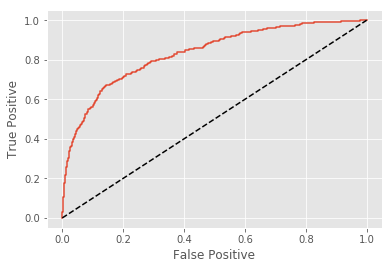

In [354]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot(np.linspace(0,1,10),np.linspace(0,1,10),'k--')
fname = 'AOC_%s.png' %fire_to_predict
plt.savefig(fname,dpi=400)

In [349]:
#This is an array of fire probabilities, one per cell in holdout_2018
fires_holdout_predict[:,1]

array([0.03002801, 0.04354587, 0.0432293 , ..., 0.02753349, 0.03415268,
       0.03461349])

In [350]:
GISCELLS = list(holdout_2018['GISYEARJOIN'])

In [351]:
Merged_geometry.head()

,GISYEARJOI,IDyear,LAT_x,LON_x,AREA_x,geometry,GISYEARJOIN,IDyear_x,LAT_y,LON_y,...,IFC001,IFF001,IFF002,IFF003,IFF004,Urban,IDyear_x.1,SF_pred,VF_pred,EF_pred
0,G060075002130020022007,2007,+37.7500665,-122.4410751,16958,POLYGON ((-122.4406159997011 37.75090200039605...,G060075002130020022007,2007,37.750066,-122.441075,...,65,62,28,14,20,1,2007,0.0,0.0,0.0
1,G060075002130020022008,2008,+37.7500665,-122.4410751,16958,POLYGON ((-122.4406159997011 37.75090200039605...,G060075002130020022008,2008,37.750066,-122.441075,...,65,62,28,14,20,1,2008,0.0,0.0,0.0
2,G060075002130020022009,2009,+37.7500665,-122.4410751,16958,POLYGON ((-122.4406159997011 37.75090200039605...,G060075002130020022009,2009,37.750066,-122.441075,...,65,62,28,14,20,1,2009,0.0,0.0,0.0
3,G060075002130020022010,2010,+37.7500665,-122.4410751,16958,POLYGON ((-122.4406159997011 37.75090200039605...,G060075002130020022010,2010,37.750066,-122.441075,...,65,62,28,14,20,1,2010,0.0,0.0,0.0
4,G060075002130020022011,2011,+37.7500665,-122.4410751,16958,POLYGON ((-122.4406159997011 37.75090200039605...,G060075002130020022011,2011,37.750066,-122.441075,...,65,62,28,14,20,1,2011,0.0,0.0,0.0


In [352]:
mapdata = SF_blocks_years[SF_blocks_years['GISYEARJOI'].isin(GISCELLS)]

In [353]:
riskmap_2018 = gpd.GeoDataFrame({'geometry':mapdata['geometry'],'fire_prob':fires_holdout_predict[:,1]})

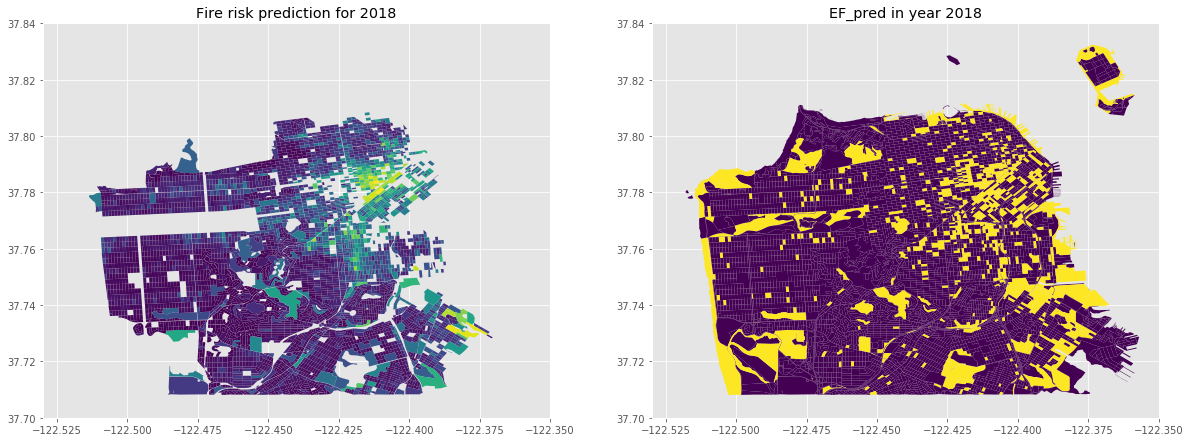

In [355]:
year = 2018
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
riskmap_2018.plot(column='fire_prob',ax=ax1)
ax1.set_xlim([-122.53,-122.35])
ax1.set_ylim([37.70,37.84])
ax1.set_title('Fire risk prediction for 2018')

ax2 = fig.add_subplot(122)
Merged_geometry[Merged_geometry['IDyear']==year].plot(column=Merged_geometry[Merged_geometry['IDyear']==year]['External_fire'].apply(classify),ax=ax2)
ax2.set_xlim([-122.53,-122.35])
ax2.set_ylim([37.70,37.84])
ax2.set_title("%s in year %s" %(fire_to_predict,str(year)))
plt.savefig("Expernal_fires_2018.png",dpi=400)
#plt.savefig("Fires_2018.png",dpi=400)

In [295]:
len(use_for_future)

4519

In [296]:
len(holdout_2018)

4529

In [365]:
features = list(X.columns)

In [371]:
feature_importances = np.array(best_estimator.named_steps['classify'].feature_importances_)
farray = np.array(best_estimator.named_steps['classify'].feature_importances_).argsort()

## Feature importances

In [380]:
count = 1
for index in farray[::-1]:
    print('%02d %19s %.3f' %(count,features[index],feature_importances[index]))
    count += 1

01        CrimeIsOther 0.238
02       External_fire 0.103
03   Inspection Number 0.054
04                   C 0.050
05                SRES 0.046
06                   D 0.041
07                 LON 0.028
08                AREA 0.025
09                COMR 0.025
10            IDyear_x 0.023
11              IFF004 0.023
12              IFF003 0.022
13                 LAT 0.019
14              H7X001 0.019
15              H7X008 0.015
16              H8C006 0.015
17              IFC001 0.014
18              H7X003 0.014
19              H8C008 0.014
20 Year Property Built 0.013
21              H8C009 0.013
22              H8C001 0.013
23                MRES 0.013
24     Number of Units 0.012
25              H8C004 0.012
26              IFF002 0.012
27 Assessed Land Value 0.012
28              H7X007 0.011
29              H8C007 0.011
30              H7X002 0.011
31            Lot Area 0.010
32              IFF001 0.010
33              H8C002 0.009
34              H7X005 0.009
35            

### Predict 2019

In [297]:
Xuse_for_future = use_for_future.drop(firecols,axis=1) #This is what we're using to predict
Xuse_for_future.drop(todrop,inplace=True,axis=1)

In [298]:
fires_future_predict = best_estimator.predict_proba(Xuse_for_future)

In [299]:
GISCELLS = list(use_for_future['GISYEARJOIN'])

In [300]:
mapdata = SF_blocks_years[SF_blocks_years['GISYEARJOI'].isin(GISCELLS)]

In [301]:
riskmap_2019 = gpd.GeoDataFrame({'geometry':mapdata['geometry'],'fire_prob':fires_future_predict[:,1]})

Text(0.5, 1.0, 'Fire risk prediction for 2018')

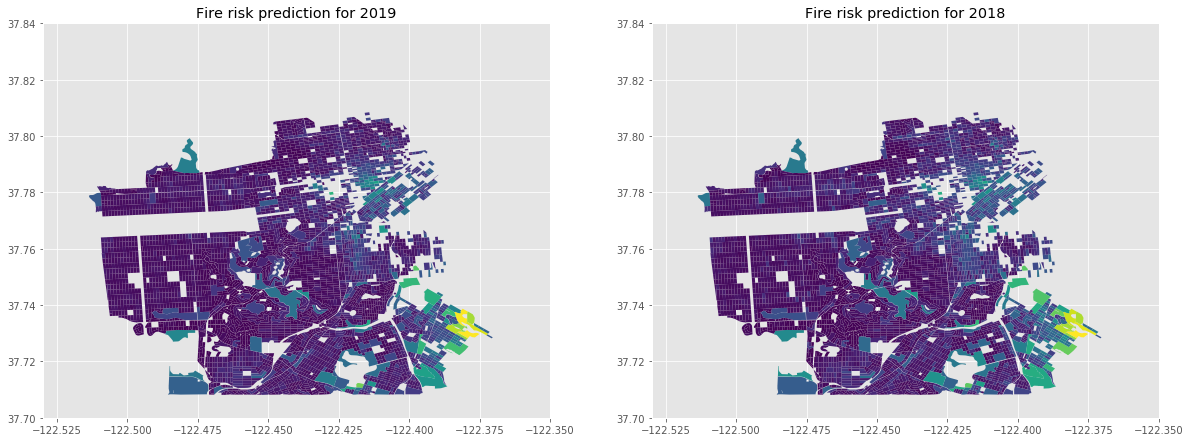

In [302]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
riskmap_2019.plot(column='fire_prob',ax=ax1)
ax1.set_xlim([-122.53,-122.35])
ax1.set_ylim([37.70,37.84])
ax1.set_title('Fire risk prediction for 2019')

ax2 = fig.add_subplot(122)
riskmap_2018.plot(column='fire_prob',ax=ax2)
ax2.set_xlim([-122.53,-122.35])
ax2.set_ylim([37.70,37.84])
ax2.set_title('Fire risk prediction for 2018')


They look very similar, but thats to be expected given that the neighborhoods haven't changed much over time

What to do now:
- Work on web app demo that displays these two maps and allows a user to select between them using a dropdown menu 
- Complete the code that generates the new dataset 
- Look into dynamic data sources, meaning that we'll get some variations in the column values per year 

In [303]:
import folium 

In [304]:
riskmap_2019.head()

,geometry,fire_prob
11,POLYGON ((-122.4406159997011 37.75090200039605...,0.008970
23,POLYGON ((-122.4384740001121 37.75102399977603...,0.009356
35,POLYGON ((-122.4358080000585 37.75762299984262...,0.011861
47,"POLYGON ((-122.436600000268 37.75435900004783,...",0.010141
59,"POLYGON ((-122.4323309993808 37.7562269999388,...",0.008343


In [305]:
riskmap_2019['BLOCKID'] = np.arange(len(riskmap_2019))

gdf_wgs84 = riskmap_2019.copy()
gdf_wgs84.crs = {'init': 'epsg:4326', 'no_defs': True}

m = folium.Map(location=[37.76, -122.42], zoom_start=12,tiles="cartodbpositron")
m.choropleth(geo_data=gdf_wgs84.to_json(),data=riskmap_2019,columns=['BLOCKID','fire_prob'],
             key_on = 'feature.properties.{}'.format('BLOCKID'),fill_opacity=0.6,
             fill_color='OrRd',line_opacity=0.1,highlight=True)

/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/folium/folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [306]:
m.save('VFmap_2019.html')